In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.random 
import datetime as dt

# Import datasets

In [119]:
df_ratings = pd.read_csv('D://PGAML//Foundation//pro//ml-100k//ml-100k/u.data',sep='\t',names=['UserID','ItemID','rating','Timestamp'])
df_movies = pd.read_csv('D://PGAML//Foundation//pro//ml-100k//ml-100k/u.item',sep='\t',names=['MovieID','title','releaseDate','videoReleaseDate','IMDbURL','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'],delimiter='|',encoding='latin-1')
df_users = pd.read_csv('D://PGAML//Foundation//pro//ml-100k//ml-100k/u.user',sep='\t',names=['UserID','Age','Gender','Occupation','ZipCode'],delimiter='|',encoding='latin-1')

In [120]:
print(df_ratings.shape)
print(df_movies.shape)
print(df_users.shape)

(100000, 4)
(1682, 24)
(943, 5)


In [121]:
print(df_ratings.isnull().sum())
print(df_movies.isnull().sum())
print(df_users.isnull().sum())

UserID       0
ItemID       0
rating       0
Timestamp    0
dtype: int64
MovieID                0
title                  0
releaseDate            1
videoReleaseDate    1682
IMDbURL                3
unknown                0
Action                 0
Adventure              0
Animation              0
Childrens              0
Comedy                 0
Crime                  0
Documentary            0
Drama                  0
Fantasy                0
Film-Noir              0
Horror                 0
Musical                0
Mystery                0
Romance                0
Sci-Fi                 0
Thriller               0
War                    0
Western                0
dtype: int64
UserID        0
Age           0
Gender        0
Occupation    0
ZipCode       0
dtype: int64


In [122]:
# Drop column videorelease, as all the rows for the column is empty

In [123]:
df_movies.drop(['videoReleaseDate'],axis=1,inplace=True)

In [124]:
print(df_movies.shape)

(1682, 23)


In [125]:
df_ratings.info()
df_movies.info()
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
UserID       100000 non-null int64
ItemID       100000 non-null int64
rating       100000 non-null int64
Timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
MovieID        1682 non-null int64
title          1682 non-null object
releaseDate    1681 non-null object
IMDbURL        1679 non-null object
unknown        1682 non-null int64
Action         1682 non-null int64
Adventure      1682 non-null int64
Animation      1682 non-null int64
Childrens      1682 non-null int64
Comedy         1682 non-null int64
Crime          1682 non-null int64
Documentary    1682 non-null int64
Drama          1682 non-null int64
Fantasy        1682 non-null int64
Film-Noir      1682 non-null int64
Horror         1682 non-null int64
Musical        1682 non-null int64
Mystery 

# Univariate plot for attributes

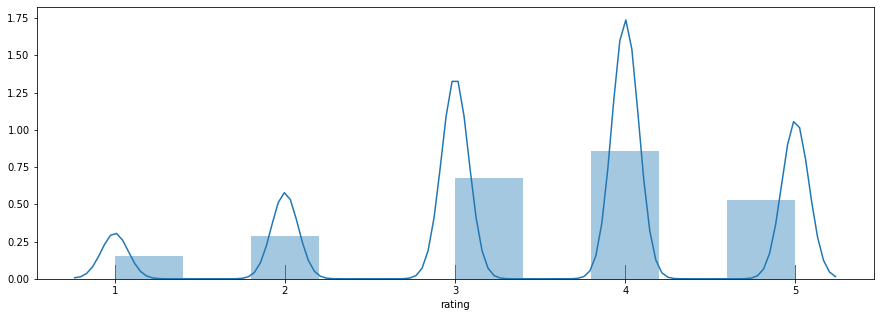

In [126]:
sns.distplot(df_ratings['rating'],bins=10,rug=True)

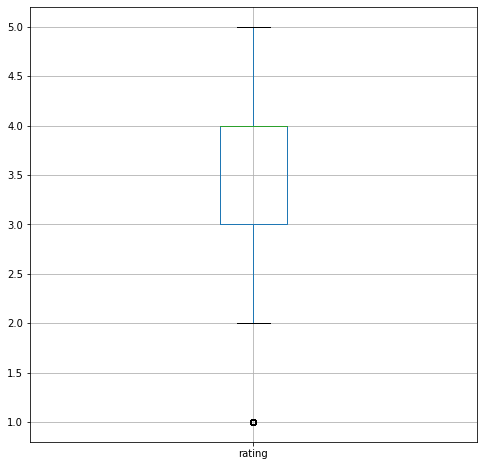

In [127]:
df_ratings.boxplot(column='rating',return_type='axes',figsize=(8,8))

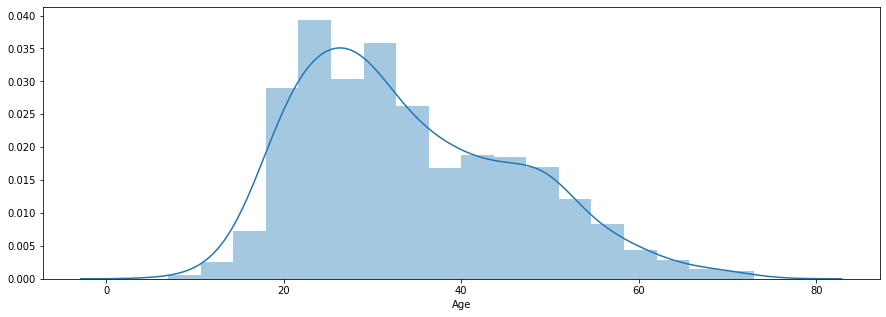

In [128]:
sns.distplot(df_users['Age'])

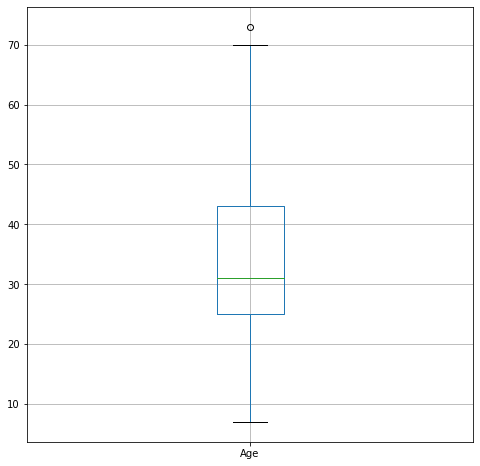

In [129]:
df_users.boxplot(column='Age',return_type='axes',figsize=(8,8))

In [130]:
df_movies.head()

,MovieID,title,releaseDate,IMDbURL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


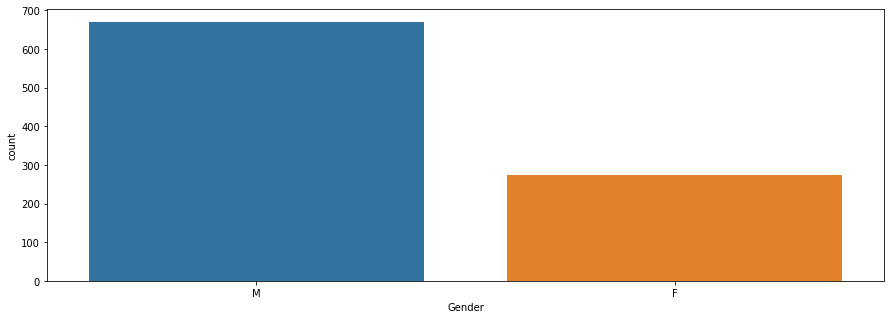

In [131]:
sns.countplot(data=df_users, x='Gender')

In [132]:
df_users['Occupation'].isnull().sum()

0

[Text(0, 0, 'technician'),
 Text(0, 0, 'other'),
 Text(0, 0, 'writer'),
 Text(0, 0, 'executive'),
 Text(0, 0, 'administrator'),
 Text(0, 0, 'student'),
 Text(0, 0, 'lawyer'),
 Text(0, 0, 'educator'),
 Text(0, 0, 'scientist'),
 Text(0, 0, 'entertainment'),
 Text(0, 0, 'programmer'),
 Text(0, 0, 'librarian'),
 Text(0, 0, 'homemaker'),
 Text(0, 0, 'artist'),
 Text(0, 0, 'engineer'),
 Text(0, 0, 'marketing'),
 Text(0, 0, 'none'),
 Text(0, 0, 'healthcare'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'salesman'),
 Text(0, 0, 'doctor')]

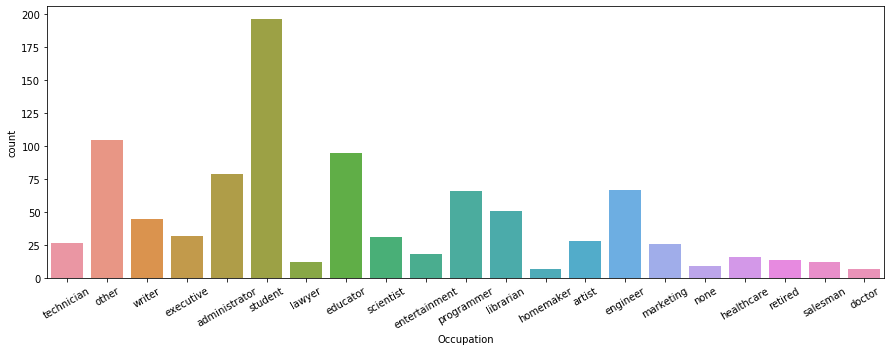

In [133]:
plt.rc("figure", figsize=(15,5))
g = sns.countplot('Occupation',data=df_users)
g.set_xticklabels(g.get_xticklabels(),rotation=30)

# Popularity of Genres over the years

In [134]:
df_movies.head()

,MovieID,title,releaseDate,IMDbURL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [135]:
df_movies[["day", "mm", "year"]] = df_movies["releaseDate"].str.split("-", expand=True)

In [136]:
df_movies.head()

,MovieID,title,releaseDate,IMDbURL,unknown,Action,Adventure,Animation,Childrens,Comedy,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,day,mm,year
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,01,Jan,1995
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,1,0,0,01,Jan,1995
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,1,0,0,01,Jan,1995
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,01,Jan,1995
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,1,0,0,01,Jan,1995


# Count per genre

In [137]:
df_movies_Count = df_movies.groupby('year',as_index=False).sum()
df_movies_Count.drop(['MovieID'],axis=1,inplace=True)
#df_movies_G.reset_index(inplace=True)

In [138]:
df_movies_Count.head()

,year,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1922,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1926,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1930,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1931,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
4,1932,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


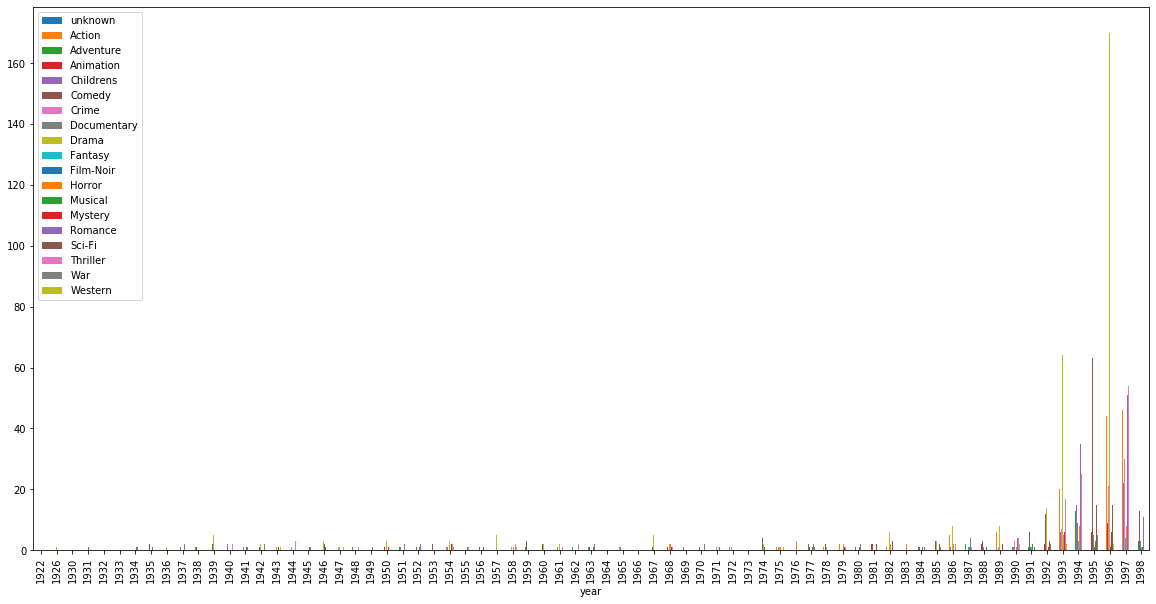

In [139]:
df_movies_Count.plot(kind='bar',x='year',figsize=(20,10))

In [140]:
# Note : can be ignored : Since the movie for each year are not clearly visible ,as lot of years are having movie releases 
#between 1-5,so considering years > 5 movie releases

In [141]:
df_movies_f = df_movies_Count[df_movies_Count.max(axis=1) > 5]

In [142]:
df_movies_f.shape

(14, 20)

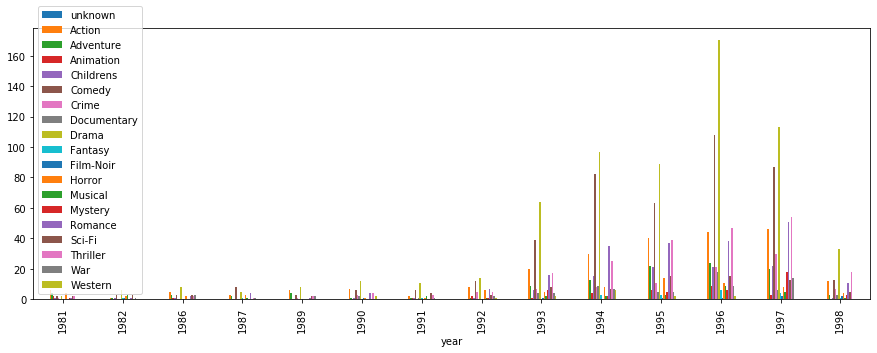

In [143]:
df_movies_f.plot(kind='bar',x='year')

# Heatmap

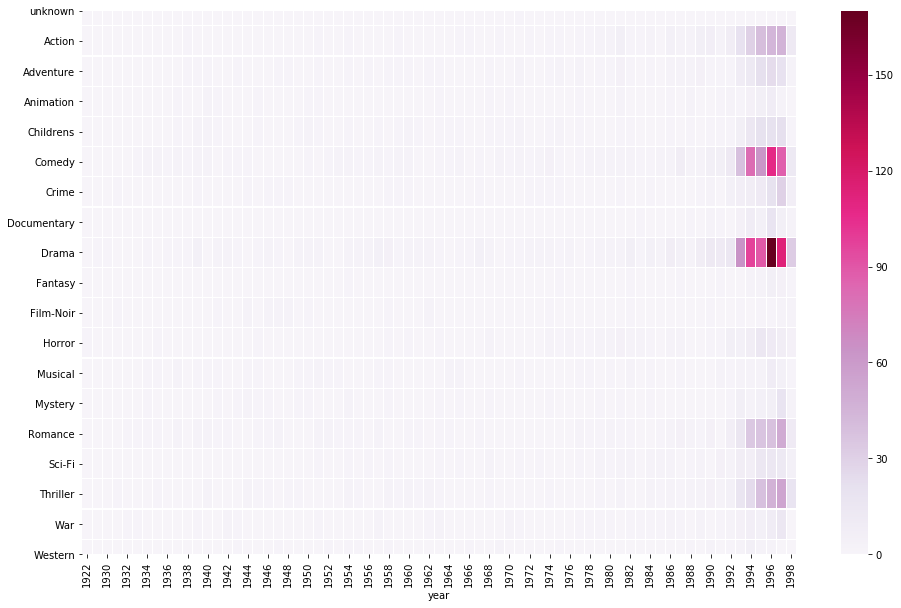

In [144]:
df_movies_heat = df_movies.groupby('year').sum()
df_movies_heat.drop(['MovieID'],axis=1,inplace=True)
plt.figure(figsize = (16,10))
#sns.palplot(sns.diverging_palette(200, 100, n=11))
sns.heatmap(df_movies_heat.transpose(), cmap="PuRd", annot=False,linewidths=0.005)


In [145]:
df_movies_try = df_movies.groupby('year').sum()
df_movies_try.drop(['MovieID'],axis=1,inplace=True)

In [146]:
df_movies_try.idxmax(axis=1)

year
1922     Horror
1926      Drama
1930      Drama
1931      Crime
1932    Romance
         ...   
1994      Drama
1995      Drama
1996      Drama
1997      Drama
1998      Drama
Length: 71, dtype: object

> **Top 25 movies with average rating** 

In [147]:
df_movie_ratings = pd.merge(df_ratings,df_movies,how='inner',left_on='ItemID',right_on='MovieID')

In [148]:
df_movie_ratings.shape

(100000, 30)

In [149]:
df_movie_ratings.head()

,UserID,ItemID,rating,Timestamp,MovieID,title,releaseDate,IMDbURL,unknown,Action,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,day,mm,year
0,196,242,3,881250949,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,24,Jan,1997
1,63,242,3,875747190,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,24,Jan,1997
2,226,242,5,883888671,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,24,Jan,1997
3,154,242,3,879138235,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,24,Jan,1997
4,306,242,5,876503793,242,Kolya (1996),24-Jan-1997,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,...,0,0,0,0,0,0,0,24,Jan,1997


In [150]:
df_movie_ratings.groupby('title').size().sort_values(ascending=False)

title
Star Wars (1977)                              583
Contact (1997)                                509
Fargo (1996)                                  508
Return of the Jedi (1983)                     507
Liar Liar (1997)                              485
                                             ... 
Man from Down Under, The (1943)                 1
Marlene Dietrich: Shadow and Light (1996)       1
Mat' i syn (1997)                               1
Mille bolle blu (1993)                          1
Á köldum klaka (Cold Fever) (1994)              1
Length: 1664, dtype: int64

In [151]:
df_movie_ratings_most_rated = df_movie_ratings.groupby('title').agg({'rating': [np.size,np.mean]})

# Mostly rated items atleast 100

In [152]:
 df_movie_ratings_most_rated[df_movie_ratings_most_rated['rating']['size'] > 100].sort_values([('rating','mean')],ascending=False)[:25]

rating          
                                                     size      mean
title                                                              
Close Shave, A (1995)                                 112  4.491071
Schindler's List (1993)                               298  4.466443
Wrong Trousers, The (1993)                            118  4.466102
Casablanca (1942)                                     243  4.456790
Shawshank Redemption, The (1994)                      283  4.445230
Rear Window (1954)                                    209  4.387560
Usual Suspects, The (1995)                            267  4.385768
Star Wars (1977)                                      583  4.358491
12 Angry Men (1957)                                   125  4.344000
Citizen Kane (1941)                                   198  4.292929
To Kill a Mockingbird (1962)                          219  4.292237
One Flew Over the Cuckoo's Nest (1975)                264  4.291667
Silence of the Lambs, The (1991)                      390  4.289744
North by Northwest (1959)                             179  4.284916
Godfather, The (1972)                                 413  4.283293
Secrets & Lies (1996)                                 162  4.265432
Good Will Hunting (1997)                              198  4.262626
Manchurian Candidate, The (1962)                      131  4.259542
Dr. Strangelove or: How I Learned to Stop Worry...    194  4.252577
Raiders of the Lost Ark (1981)                        420  4.252381
Vertigo (1958)                                        179  4.251397
Titanic (1997)                                        350  4.245714
Lawrence of Arabia (1962)                             173  4.231214
Maltese Falcon, The (1941)                            138  4.210145
Empire Strikes Back, The (1980)                       367  4.204360

# Validity of statements

In [153]:
df_users.shape

(943, 5)

In [154]:
df_movie_ratings.shape

(100000, 30)

In [155]:
df_user_movies = pd.merge(df_users,df_movie_ratings,how='inner')

In [156]:
df_user_movies.drop(['Timestamp'],axis=1,inplace=True)

In [157]:
print(df_user_movies.shape)
df_user_movies.tail(5)

(100000, 33)


,UserID,Age,Gender,Occupation,ZipCode,ItemID,rating,MovieID,title,releaseDate,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,day,mm,year
99995,943,22,M,student,77841,1188,3,1188,Young Guns II (1990),01-Jan-1990,...,0,0,0,0,0,0,1,01,Jan,1990
99996,943,22,M,student,77841,415,1,415,"Apple Dumpling Gang, The (1975)",01-Jan-1975,...,0,0,0,0,0,0,1,01,Jan,1975
99997,943,22,M,student,77841,373,3,373,Judge Dredd (1995),01-Jan-1995,...,0,0,0,1,0,0,0,01,Jan,1995
99998,943,22,M,student,77841,541,4,541,Mortal Kombat (1995),01-Jan-1995,...,0,0,0,0,0,0,0,01,Jan,1995
99999,943,22,M,student,77841,1330,3,1330,An Unforgettable Summer (1994),01-Jan-1994,...,0,0,0,0,0,0,0,01,Jan,1994


In [158]:
df_stats = df_user_movies[['Gender','unknown','Action','Adventure','Animation','Childrens','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']].groupby('Gender').sum()

In [189]:
df_stats

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Gender,,,,,,,,,,,,,,,,,,,
F,2,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371
M,8,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483


In [190]:
df_stats_final = df_stats.apply(lambda r :  100*r/r.sum(),axis=0)

In [191]:
df_stats_final.applymap(lambda d: '{0:.1f}%'.format(d))

,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Gender,,,,,,,,,,,,,,,,,,,
F,20.0%,21.3%,22.8%,27.6%,31.1%,27.0%,22.3%,24.7%,27.6%,26.8%,22.2%,22.5%,29.1%,25.1%,30.1%,20.7%,23.3%,23.3%,20.0%
M,80.0%,78.7%,77.2%,72.4%,68.9%,73.0%,77.7%,75.3%,72.4%,73.2%,77.8%,77.5%,70.9%,74.9%,69.9%,79.3%,76.7%,76.7%,80.0%


In [192]:
#   Ho = Men watch more drama than women, Ha <> Men watch more drama than women : 72.4% against 27.6% => so fail to reject Ho
#   Ho = Men watch more romance than women, Ha <> Men watch more romance than women : 69.9% against 30.1% => so fail to reject Ho
#   Ho = Women watch more Sci-Fi than men, Ha <> Women watch more Sci-Fi than men : 20.7% against 79.3% => so reject Ho